# https://servicos.dnit.gov.br/dnitcloud/index.php/s/oTpPRmYs5AAdiNr?path=%2FSNV%20Bases%20Geom%C3%A9tricas%20(2013-Atual)%20(SHP)

                                            geometry
0  LINESTRING (-47.85885 -15.68816, -47.85879 -15...
1  LINESTRING (-47.83735 -15.6818, -47.83719 -15....
2  LINESTRING (-47.8076 -15.66586, -47.80747 -15....
3  LINESTRING (-47.78774 -15.65664, -47.7876 -15....
4  LINESTRING (-47.70599 -15.61521, -47.70587 -15...
None


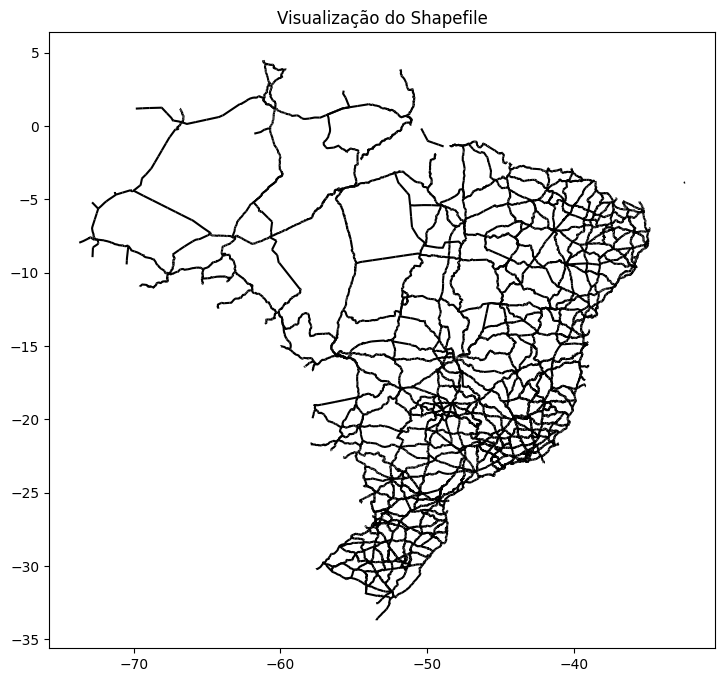

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caminho do shapefile (pode ser .shp ou só a pasta com os arquivos)
shapefile_path = "SNV_202507A.shp"

# Ler o shapefile
gdf = gpd.read_file(shapefile_path)

# Mostrar informações básicas
print(gdf.head())
print(gdf.crs)

# Plotar
gdf.plot(figsize=(10, 8), edgecolor="black")
plt.title("Visualização do Shapefile")
plt.show()


In [10]:
gdf = gpd.read_file(shapefile_path)

# Se não tiver CRS definido, definir manualmente
if gdf.crs is None:
    print("⚠️ Shapefile sem CRS definido. Definindo como WGS84 (EPSG:4326).")
    gdf = gdf.set_crs("EPSG:4326")

# Se ainda estiver em graus, reprojetar para metros
if gdf.crs.is_geographic:
    gdf = gdf.to_crs(epsg=3857)

# Calcular comprimento de cada trecho
gdf["comprimento_m"] = gdf.length

print(f"Quantidade de trechos: {len(gdf)}")
print(gdf[["comprimento_m"]].head())
print(f"Comprimento total: {gdf['comprimento_m'].sum():.2f} m")

⚠️ Shapefile sem CRS definido. Definindo como WGS84 (EPSG:4326).
Quantidade de trechos: 7626
   comprimento_m
0    2507.026431
1    3820.232442
2    2455.895572
3   10294.585677
4    3978.273959
Comprimento total: 136720917.47 m


In [12]:
gdf_ordenado = gdf.sort_values(by="comprimento_m", ascending=False)

# Mostrar os 5 primeiros
print(gdf_ordenado.head())

                                               geometry  comprimento_m
2249  LINESTRING (-6070084.535 -253492.432, -6069991...  343975.410310
2805  LINESTRING (-6525153.91 -1245866.979, -6535498...  261059.713401
2642  LINESTRING (-6350274.524 -121032.65, -6340661....  226499.807038
6792  LINESTRING (-5483111.953 -926411.123, -5445840...  217772.944068
183   LINESTRING (-5122438.016 -1628784.272, -512241...  196981.979947
